# Multiprocessing using Pools 
A simple framework for assessing the impact of multiprocessing on runtime on a multi-core machine. 

In [1]:
import time
import math
import multiprocessing
from multiprocessing import Pool
import matplotlib.pyplot as plt

# A function for timing a job that uses a pool of processes.
#  f is a function that takes a single argument
#  data is an array of arguments on which f will be mapped
#  pool_size is the number of processes in the pool. 
def pool_process(f, data, pool_size):
    tp1 = time.time()
    pool = Pool(processes=pool_size) # initialize the Pool.
    result = pool.map(f, data)       # map f to the data using the Pool of processes to do the work 
    pool.close() # No more processes
    pool.join()  # Wait for the pool processing to complete. 
    # print("Results", result)
    # print("Overall Time:", int(time.time()-tp1))
    return float(time.time()-tp1)
 

## Load Target function separately 
The target function needs to be loaded in from a separate python file.
So save this function declaration in a file miscFunc.py

    import math

    def my_func(x):  
        s = math.sqrt(x)  
        return s
    

In [2]:
import miscFunc as miscFunc # if miscFunc.py is changed the kernel needs to be restarted. 

This verbose version shows which process in the pool is running each task.   
Put this definition in miscFunc.py as well.  

    def my_func_verbose(x):
        s = math.sqrt(x)
        print("Task", multiprocessing.current_process(), x, s)
        return s

In [3]:
dataRange = range(20)

Use the pool_process function to apply my_func to the data in dataRange.  
This task is so light it requires very little processing time. 

In [4]:
dataRange = range(10)
pool_process(miscFunc.my_func, dataRange, 1)

3.525559902191162

## A naive function for checking primes 

In [5]:
# def check_prime(num):
#     t1 = time.time()
#     res = False
#     if num > 0:
#         # check for factors
#         for i in range(2,num):
#             if (num % i) == 0:
#                 print(num,"is not a prime number")
#                 print(i,"times",num//i,"is",num)
#                 print("Time:", int(time.time()-t1))
#                 break
#         else:
#             print(num,"is a prime number")
#             print("Time:", time.time()-t1) 
#             res = True
#             # if input number is less than
#             # or equal to 1, it is not prime
#     print("Task", multiprocessing.current_process(), num, res)
#     return res


In [6]:
miscFunc.check_prime(15488801)

15488801 is a prime number
Time: 2.3850488662719727
Task <_MainProcess name='MainProcess' parent=None started> 15488801 True


True

In [7]:
miscFunc.check_prime(15488803)

15488803 is not a prime number
11 times 1408073 is 15488803
Time: 0
Task <_MainProcess name='MainProcess' parent=None started> 15488803 False


False

In [8]:
check_work = [45,13,4]

In [9]:
pool_process(miscFunc.my_func_verbose, check_work, 1)

3.508424997329712

# Multiprocessing comparison for prime number checking function

## Set up input array

In [10]:
one_core_runtime = []

for i in range(1, 1001, 100):
    number_array = [x for x in range(10000000, 10000000 + i)]
    one_core_runtime.append(pool_process(miscFunc.check_prime, number_array, 1))
    print(i)

1
101
201
301
401
501
601
701
801
901


In [11]:
two_core_runtime = []

for i in range(1, 1001, 100):
    number_array = [x for x in range(10000000, 10000000 + i)]
    two_core_runtime.append(pool_process(miscFunc.check_prime, number_array, 2))
    print(i)

1
101
201
301
401
501
601
701
801
901


In [12]:
three_core_runtime = []

for i in range(1, 1001, 100):
    number_array = [x for x in range(10000000, 10000000 + i)]
    three_core_runtime.append(pool_process(miscFunc.check_prime, number_array, 3))
    print(i)

1
101
201
301
401
501
601
701
801
901


In [13]:
four_core_runtime = []

for i in range(1, 1001, 100):
    number_array = [x for x in range(10000000, 10000000 + i)]
    four_core_runtime.append(pool_process(miscFunc.check_prime, number_array, 4))
    print(i)

1
101
201
301
401
501
601
701
801
901


Text(0.5, 1.0, 'Multiprocessing runtime analysis')

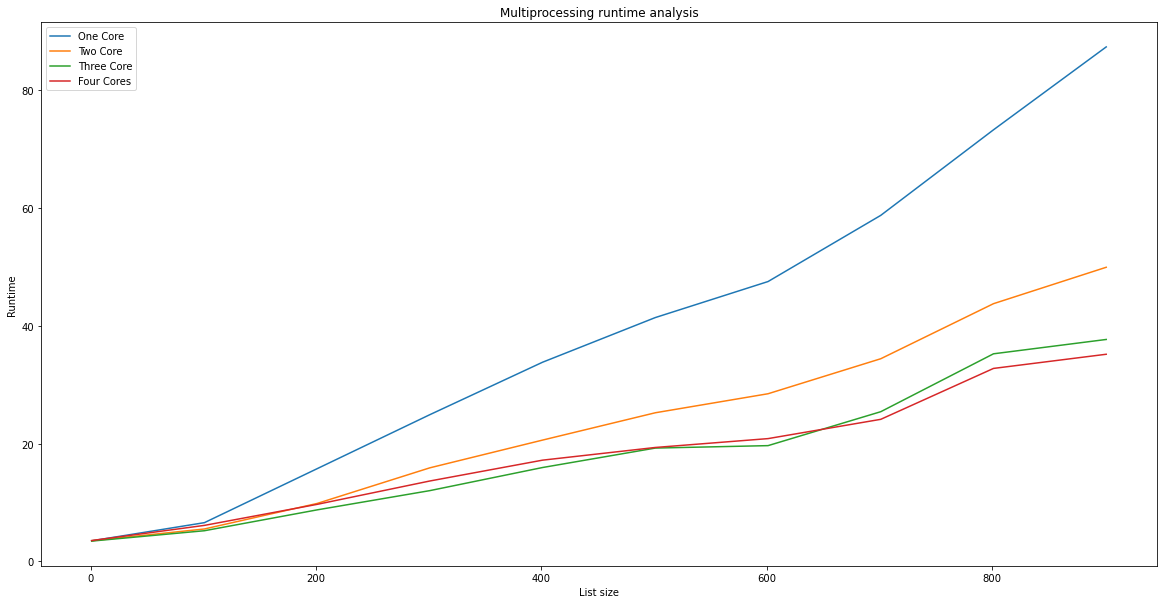

In [14]:
size_of_lists = [x for x in range(1, 1001, 100)]

fig, ax = plt.subplots(figsize=(20,10))
ax.plot(size_of_lists, one_core_runtime, label="One Core")
ax.plot(size_of_lists, two_core_runtime, label="Two Core")
ax.plot(size_of_lists, three_core_runtime, label="Three Core")
ax.plot(size_of_lists, four_core_runtime, label="Four Cores")

plt.legend()
plt.xlabel("List size")
plt.ylabel("Runtime (seconds)")
plt.title("Multiprocessing runtime analysis")